[tensor(0.1197, device='cuda:0'), tensor(0.1550, device='cuda:0'), tensor(0.3796, device='cuda:0')]
[tensor(0.6056, device='cuda:0'), tensor(0.4042, device='cuda:0'), tensor(0.5731, device='cuda:0'), tensor(-0.0118, device='cuda:0')]
[tensor(0.6109, device='cuda:0'), tensor(0.9507, device='cuda:0'), tensor(0.8516, device='cuda:0'), tensor(-0.0394, device='cuda:0'), tensor(-0.0427, device='cuda:0')]
[tensor(0.5444, device='cuda:0'), tensor(0.7582, device='cuda:0'), tensor(0.8751, device='cuda:0'), tensor(0.4145, device='cuda:0'), tensor(-0.0436, device='cuda:0'), tensor(-0.0194, device='cuda:0')]


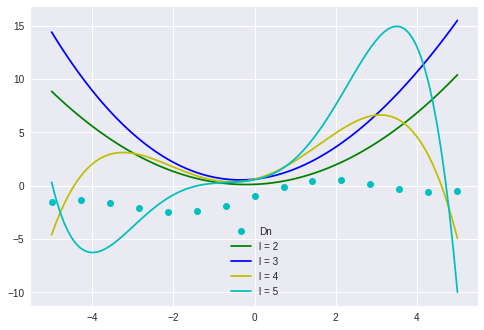

In [25]:
import numpy as np
import torch
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


x_values = torch.tensor(np.linspace(-5, 5, 15), device=device).float()
x_test = torch.tensor(np.linspace(-5, 5, 100), device=device).float()

learning_poly_rate = 0.0000001
num_poly_iterations = 10000

color = ['r', 'k', 'g', 'b', 'y', 'c']
def get_y_values(x_values):
    y_values = list()
    value = 0.0
    for i in range(len(x_values)):
        value = torch.sin(x_values[i]) + (0.3 * x_values[i]) -1
        y_values.append(value)
    return y_values

def polynom_function(x, param_init):
    func_val = 0.0
    for i in range(len(param_init)):
        func_val = func_val + param_init[i] * x**i 
    return func_val
  
  
def step_gradient_preprocess(param_init, points, learningRate, userlam):
    N = len(points)
    act_y_values = 0.0 
    act_y_values = get_y_values(torch.tensor(points, device=device).float())
    param_grad_values = [0.0] * len(param_init)
    param_grad_val = 0.0
    param_grad_final_val = [0.0] * len(param_init)
    for i in range(len(points)):
        x = points[i]
        y = act_y_values[i]
        
        for i in range(len(param_init)):
            param_grad_val = param_grad_values[i]
            param_grad_val += - (2/N)* (x**i) * ((y - polynom_function(x, param_init)))
            param_grad_values[i] = param_grad_val

    for i in range(len(param_init)):
        if(i == 0):
            param_grad_final_val[i] = param_init[i] - (learningRate * param_grad_values[i])
        else:
            param_grad_final_val[i] = param_init[i] - (learningRate * (param_grad_values[i] + 2 * userlam * param_init[i]))

    return param_grad_final_val
  
def gradient_descent_preprocess(points, param_init, learning_rate, num_iterations, userlam):
    teta_vector = param_init
    for i in range(num_iterations):
        teta_vector = step_gradient_preprocess(teta_vector, points, torch.tensor(learning_rate, device=device).float(), torch.tensor(userlam, device=device).float())
    return teta_vector

plt.plot(x_values.cpu().numpy(), get_y_values(x_values), 'co', label='Dn')

for i in range(3, 7):
    legend_String = 'l = '+ str(i-1)
    param_init = torch.tensor(np.random.uniform(0, 1, i), device=device).float()
    polynom_parameters = gradient_descent_preprocess(x_values, param_init, learning_poly_rate, num_poly_iterations, userlam=0.01)
    print(polynom_parameters)
    plt.plot(x_test.cpu().numpy(), polynom_function(x_test, polynom_parameters).cpu().numpy(),  label = legend_String, color = color[i-1])
    plt.legend()
plt.show()

In [2]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x58126000 @  0x7fc44e5572a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch